# 基本分类：对服装图像进行分类

本指南将训练一个神经网络模型，对运动鞋和衬衫等服装图像进行分类。即使您不理解所有细节也没关系；这只是对完整 TensorFlow 程序的快速概述，详细内容会在您实际操作的同时进行介绍。

本指南使用了 [tf.keras](https://tensorflow.google.cn/guide/keras)，它是 TensorFlow 中用来构建和训练模型的高级 API。

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## 导入 Fashion MNIST 数据集

本指南使用 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 数据集，该数据集包含 10 个类别的 70,000 个灰度图像。这些图像以低分辨率（28x28 像素）展示了单件衣物，如下所示：

<table>
  <tr><td>     <img alt="Fashion MNIST sprite" src="https://tensorflow.google.cn/images/fashion-mnist-sprite.png" class=""> </td></tr>
  <tr><td align="center">     <b>图 1.</b>  <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST 样本</a>（由 Zalando 提供，MIT 许可）。<br>
</td></tr>
</table>

Fashion MNIST 旨在临时替代经典 [MNIST](http://yann.lecun.com/exdb/mnist/) 数据集，后者常被用作计算机视觉机器学习程序的“Hello, World”。MNIST 数据集包含手写数字（0、1、2 等）的图像，其格式与您将使用的衣物图像的格式相同。

本指南使用 Fashion MNIST 来实现多样化，因为它比常规 MNIST 更具挑战性。这两个数据集都相对较小（大多数据集不算小？），都用于验证某个算法是否按预期工作。对于代码的测试和调试，它们都是很好的起点。

在本指南中，我们使用 60,000 个图像来训练网络，使用 10,000 个图像来评估网络学习对图像分类的准确率。您可以直接从 TensorFlow 访问 Fashion MNIST。请运行以下代码，直接从 TensorFlow 中导入和加载 Fashion MNIST 数据：

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


加载数据集会返回四个 NumPy 数组：

- `train_images` 和 `train_labels` 数组是*训练集*，即模型用于学习的数据。
- *测试集*、`test_images` 和 `test_labels` 数组用来对模型进行测试。

图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。*标签*是整数数组，介于 0 到 9 之间。这些标签对应于图像所代表的服装*类*：

<table>
  <tr>
    <th>标签</th>
    <th>类</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T恤/上衣</td>
  </tr>
  <tr>
    <td>1</td>
    <td>裤子</td>
  </tr>
    <tr>
    <td>2</td>
    <td>套头衫</td>
  </tr>
    <tr>
    <td>3</td>
    <td>连衣裙</td>
  </tr>
    <tr>
    <td>4</td>
    <td>外套</td>
  </tr>
    <tr>
    <td>5</td>
    <td>凉鞋</td>
  </tr>
    <tr>
    <td>6</td>
    <td>衬衫</td>
  </tr>
    <tr>
    <td>7</td>
    <td>运动鞋</td>
  </tr>
    <tr>
    <td>8</td>
    <td>包</td>
  </tr>
    <tr>
    <td>9</td>
    <td>短靴</td>
  </tr>
</table>

每个图像都会被映射到一个标签。由于数据集不包括*类名称*，请将它们存储在下方，供稍后绘制图像时使用：

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 浏览数据

在训练模型之前，我们先浏览一下数据集的格式。以下代码显示训练集中有 60,000 个图像，每个图像由 28 x 28 的像素表示：

In [5]:
train_images.shape

(60000, 28, 28)

同样，训练集中有 60,000 个标签：

In [6]:
len(train_labels)

60000

每个标签都是一个 0 到 9 之间的整数：

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

测试集中有 10,000 个图像。同样，每个图像都由 28x28 个像素表示：

In [8]:
test_images.shape

(10000, 28, 28)

测试集包含 10,000 个图像标签：

In [9]:
len(test_labels)

10000

## 预处理数据

在训练网络之前，必须对数据进行预处理。如果您检查训练集中的第一个图像，您会看到像素值处于 0 到 255 之间：

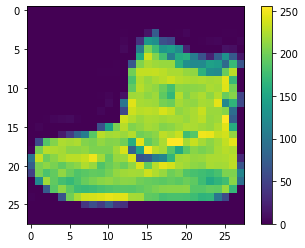

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

将这些值缩小至 0 到 1 之间，然后将其馈送到神经网络模型。为此，请将这些值除以 255。请务必以相同的方式对*训练集*和*测试集*进行预处理：

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

为了验证数据的格式是否正确，以及您是否已准备好构建和训练网络，让我们显示*训练集*中的前 25 个图像，并在每个图像下方显示类名称。

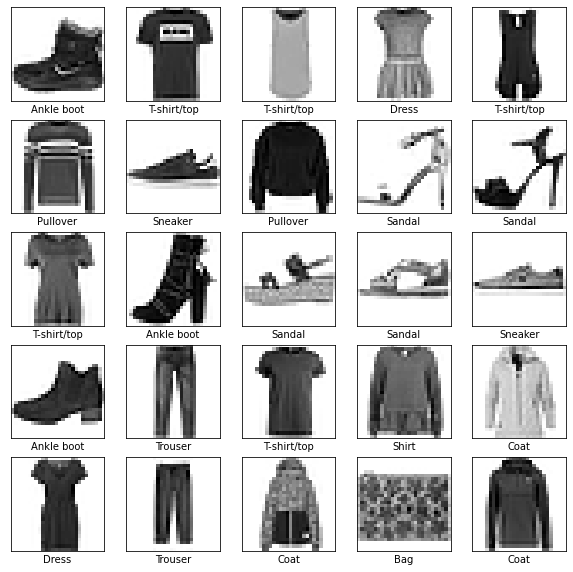

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 构建模型

构建神经网络需要先配置模型的层，然后再编译模型。

### 设置层

神经网络的基本组成部分是*层*。层会从向其馈送的数据中提取表示形式。希望这些表示形式有助于解决手头上的问题。

大多数深度学习都包括将简单的层链接在一起。大多数层（如 `tf.keras.layers.Dense`）都具有在训练期间才会学习的参数。

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

该网络的第一层 `tf.keras.layers.Flatten` 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。

展平像素后，网络会包括两个 `tf.keras.layers.Dense` 层的序列。它们是密集连接或全连接神经层。第一个 `Dense` 层有 128 个节点（或神经元）。第二个（也是最后一个）层会返回一个长度为 10 的 logits 数组。每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。

### 编译模型

在准备对模型进行训练之前，还需要再对其进行一些设置。以下内容是在模型的*编译*步骤中添加的：

- *损失函数* - 用于测量模型在训练期间的准确率。您会希望最小化此函数，以便将模型“引导”到正确的方向上。
- *优化器* - 决定模型如何根据其看到的数据和自身的损失函数进行更新。
- *指标* - 用于监控训练和测试步骤。以下示例使用了*准确率*，即被正确分类的图像的比率。

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 训练模型

训练神经网络模型需要执行以下步骤：

1. 将训练数据馈送给模型。在本例中，训练数据位于 `train_images` 和 `train_labels` 数组中。
2. 模型学习将图像和标签关联起来。
3. 要求模型对测试集（在本例中为 `test_images` 数组）进行预测。
4. 验证预测是否与 `test_labels` 数组中的标签相匹配。


### 向模型馈送数据

要开始训练，请调用 `model.fit` 方法，这样命名是因为该方法会将模型与训练数据进行“拟合”：

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 2.4358 - accuracy: 0.1250

  34/1875 [..............................] - ETA: 2s - loss: 1.2470 - accuracy: 0.5680

  68/1875 [>.............................] - ETA: 2s - loss: 1.0534 - accuracy: 0.6388

 102/1875 [>.............................] - ETA: 2s - loss: 0.9325 - accuracy: 0.6792

 137/1875 [=>............................] - ETA: 2s - loss: 0.8619 - accuracy: 0.7003

 172/1875 [=>............................] - ETA: 2s - loss: 0.8112 - accuracy: 0.7175

 207/1875 [==>...........................] - ETA: 2s - loss: 0.7793 - accuracy: 0.7298

 241/1875 [==>...........................] - ETA: 2s - loss: 0.7421 - accuracy: 0.7453

 275/1875 [===>..........................] - ETA: 2s - loss: 0.7136 - accuracy: 0.7543

 309/1875 [===>..........................] - ETA: 2s - loss: 0.6935 - accuracy: 0.7620

 343/1875 [====>.........................] - ETA: 2s - loss: 0.6746 - accuracy: 0.7678

 377/1875 [=====>........................] - ETA: 2s - loss: 0.6602 - accuracy: 0.7725

 412/1875 [=====>........................] - ETA: 2s - loss: 0.6499 - accuracy: 0.7758

 447/1875 [======>.......................] - ETA: 2s - loss: 0.6388 - accuracy: 0.7800

 482/1875 [======>.......................] - ETA: 2s - loss: 0.6300 - accuracy: 0.7825

 517/1875 [=======>......................] - ETA: 2s - loss: 0.6189 - accuracy: 0.7864

 552/1875 [=======>......................] - ETA: 1s - loss: 0.6095 - accuracy: 0.7895

 586/1875 [========>.....................] - ETA: 1s - loss: 0.6004 - accuracy: 0.7921

 620/1875 [========>.....................] - ETA: 1s - loss: 0.5932 - accuracy: 0.7949

 654/1875 [=========>....................] - ETA: 1s - loss: 0.5855 - accuracy: 0.7967

 689/1875 [==========>...................] - ETA: 1s - loss: 0.5807 - accuracy: 0.7981

 722/1875 [==========>...................] - ETA: 1s - loss: 0.5792 - accuracy: 0.7991

 757/1875 [===========>..................] - ETA: 1s - loss: 0.5741 - accuracy: 0.8016

 791/1875 [===========>..................] - ETA: 1s - loss: 0.5685 - accuracy: 0.8035

 825/1875 [============>.................] - ETA: 1s - loss: 0.5633 - accuracy: 0.8048

 859/1875 [============>.................] - ETA: 1s - loss: 0.5583 - accuracy: 0.8062

 894/1875 [=============>................] - ETA: 1s - loss: 0.5531 - accuracy: 0.8077

 929/1875 [=============>................] - ETA: 1s - loss: 0.5499 - accuracy: 0.8084

 964/1875 [==============>...............] - ETA: 1s - loss: 0.5477 - accuracy: 0.8095

 999/1875 [==============>...............] - ETA: 1s - loss: 0.5461 - accuracy: 0.8099

1033/1875 [===============>..............] - ETA: 1s - loss: 0.5423 - accuracy: 0.8108

1067/1875 [================>.............] - ETA: 1s - loss: 0.5396 - accuracy: 0.8115

1102/1875 [================>.............] - ETA: 1s - loss: 0.5348 - accuracy: 0.8130

1137/1875 [=================>............] - ETA: 1s - loss: 0.5316 - accuracy: 0.8137

1172/1875 [=================>............] - ETA: 1s - loss: 0.5290 - accuracy: 0.8147

1207/1875 [==================>...........] - ETA: 0s - loss: 0.5264 - accuracy: 0.8156

1241/1875 [==================>...........] - ETA: 0s - loss: 0.5227 - accuracy: 0.8166

1275/1875 [===================>..........] - ETA: 0s - loss: 0.5204 - accuracy: 0.8174

1309/1875 [===================>..........] - ETA: 0s - loss: 0.5186 - accuracy: 0.8181

1344/1875 [====================>.........] - ETA: 0s - loss: 0.5164 - accuracy: 0.8192

1379/1875 [=====================>........] - ETA: 0s - loss: 0.5157 - accuracy: 0.8192

1413/1875 [=====================>........] - ETA: 0s - loss: 0.5138 - accuracy: 0.8199

1448/1875 [======================>.......] - ETA: 0s - loss: 0.5114 - accuracy: 0.8203

1482/1875 [======================>.......] - ETA: 0s - loss: 0.5107 - accuracy: 0.8205

1515/1875 [=======================>......] - ETA: 0s - loss: 0.5091 - accuracy: 0.8210

1550/1875 [=======================>......] - ETA: 0s - loss: 0.5080 - accuracy: 0.8214

1585/1875 [========================>.....] - ETA: 0s - loss: 0.5055 - accuracy: 0.8222

1620/1875 [========================>.....] - ETA: 0s - loss: 0.5040 - accuracy: 0.8227

1655/1875 [=========================>....] - ETA: 0s - loss: 0.5022 - accuracy: 0.8233

1690/1875 [==========================>...] - ETA: 0s - loss: 0.5003 - accuracy: 0.8241

1724/1875 [==========================>...] - ETA: 0s - loss: 0.4998 - accuracy: 0.8242

1759/1875 [===========================>..] - ETA: 0s - loss: 0.4981 - accuracy: 0.8247

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4964 - accuracy: 0.8252

1828/1875 [============================>.] - ETA: 0s - loss: 0.4949 - accuracy: 0.8256

1863/1875 [============================>.] - ETA: 0s - loss: 0.4932 - accuracy: 0.8262

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4924 - accuracy: 0.8265


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4520 - accuracy: 0.8125

  36/1875 [..............................] - ETA: 2s - loss: 0.4061 - accuracy: 0.8602

  70/1875 [>.............................] - ETA: 2s - loss: 0.4162 - accuracy: 0.8567

 104/1875 [>.............................] - ETA: 2s - loss: 0.4067 - accuracy: 0.8552

 138/1875 [=>............................] - ETA: 2s - loss: 0.3932 - accuracy: 0.8582

 172/1875 [=>............................] - ETA: 2s - loss: 0.3948 - accuracy: 0.8579

 206/1875 [==>...........................] - ETA: 2s - loss: 0.3945 - accuracy: 0.8582

 241/1875 [==>...........................] - ETA: 2s - loss: 0.3933 - accuracy: 0.8594

 276/1875 [===>..........................] - ETA: 2s - loss: 0.3887 - accuracy: 0.8629

 310/1875 [===>..........................] - ETA: 2s - loss: 0.3835 - accuracy: 0.8632

 345/1875 [====>.........................] - ETA: 2s - loss: 0.3815 - accuracy: 0.8640

 380/1875 [=====>........................] - ETA: 2s - loss: 0.3801 - accuracy: 0.8644

 414/1875 [=====>........................] - ETA: 2s - loss: 0.3789 - accuracy: 0.8653

 448/1875 [======>.......................] - ETA: 2s - loss: 0.3786 - accuracy: 0.8654

 482/1875 [======>.......................] - ETA: 2s - loss: 0.3787 - accuracy: 0.8650

 517/1875 [=======>......................] - ETA: 1s - loss: 0.3809 - accuracy: 0.8638

 552/1875 [=======>......................] - ETA: 1s - loss: 0.3814 - accuracy: 0.8642

 587/1875 [========>.....................] - ETA: 1s - loss: 0.3841 - accuracy: 0.8633

 621/1875 [========>.....................] - ETA: 1s - loss: 0.3848 - accuracy: 0.8630

 656/1875 [=========>....................] - ETA: 1s - loss: 0.3852 - accuracy: 0.8628

 691/1875 [==========>...................] - ETA: 1s - loss: 0.3872 - accuracy: 0.8622

 726/1875 [==========>...................] - ETA: 1s - loss: 0.3877 - accuracy: 0.8618

 761/1875 [===========>..................] - ETA: 1s - loss: 0.3891 - accuracy: 0.8613

 795/1875 [===========>..................] - ETA: 1s - loss: 0.3896 - accuracy: 0.8608

 829/1875 [============>.................] - ETA: 1s - loss: 0.3893 - accuracy: 0.8609

 863/1875 [============>.................] - ETA: 1s - loss: 0.3883 - accuracy: 0.8612

 897/1875 [=============>................] - ETA: 1s - loss: 0.3886 - accuracy: 0.8608

 932/1875 [=============>................] - ETA: 1s - loss: 0.3880 - accuracy: 0.8612

 966/1875 [==============>...............] - ETA: 1s - loss: 0.3867 - accuracy: 0.8616

1001/1875 [===============>..............] - ETA: 1s - loss: 0.3855 - accuracy: 0.8618

1035/1875 [===============>..............] - ETA: 1s - loss: 0.3867 - accuracy: 0.8615

1070/1875 [================>.............] - ETA: 1s - loss: 0.3855 - accuracy: 0.8621

1105/1875 [================>.............] - ETA: 1s - loss: 0.3848 - accuracy: 0.8624

1140/1875 [=================>............] - ETA: 1s - loss: 0.3837 - accuracy: 0.8628

1175/1875 [=================>............] - ETA: 1s - loss: 0.3833 - accuracy: 0.8631

1210/1875 [==================>...........] - ETA: 0s - loss: 0.3822 - accuracy: 0.8636

1244/1875 [==================>...........] - ETA: 0s - loss: 0.3822 - accuracy: 0.8634

1279/1875 [===================>..........] - ETA: 0s - loss: 0.3807 - accuracy: 0.8639

1313/1875 [====================>.........] - ETA: 0s - loss: 0.3801 - accuracy: 0.8641

1347/1875 [====================>.........] - ETA: 0s - loss: 0.3790 - accuracy: 0.8644

1382/1875 [=====================>........] - ETA: 0s - loss: 0.3784 - accuracy: 0.8645

1416/1875 [=====================>........] - ETA: 0s - loss: 0.3775 - accuracy: 0.8646

1450/1875 [======================>.......] - ETA: 0s - loss: 0.3768 - accuracy: 0.8648

1484/1875 [======================>.......] - ETA: 0s - loss: 0.3763 - accuracy: 0.8649

1518/1875 [=======================>......] - ETA: 0s - loss: 0.3759 - accuracy: 0.8651

1552/1875 [=======================>......] - ETA: 0s - loss: 0.3755 - accuracy: 0.8650

1586/1875 [========================>.....] - ETA: 0s - loss: 0.3744 - accuracy: 0.8654

1620/1875 [========================>.....] - ETA: 0s - loss: 0.3731 - accuracy: 0.8661

1654/1875 [=========================>....] - ETA: 0s - loss: 0.3724 - accuracy: 0.8663

1688/1875 [==========================>...] - ETA: 0s - loss: 0.3721 - accuracy: 0.8663

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3709 - accuracy: 0.8667

1758/1875 [===========================>..] - ETA: 0s - loss: 0.3705 - accuracy: 0.8666

1793/1875 [===========================>..] - ETA: 0s - loss: 0.3696 - accuracy: 0.8668

1827/1875 [============================>.] - ETA: 0s - loss: 0.3691 - accuracy: 0.8670

1862/1875 [============================>.] - ETA: 0s - loss: 0.3694 - accuracy: 0.8668

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3698 - accuracy: 0.8669


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.5900 - accuracy: 0.8438

  36/1875 [..............................] - ETA: 2s - loss: 0.3387 - accuracy: 0.8741

  71/1875 [>.............................] - ETA: 2s - loss: 0.3341 - accuracy: 0.8724

 105/1875 [>.............................] - ETA: 2s - loss: 0.3388 - accuracy: 0.8708

 140/1875 [=>............................] - ETA: 2s - loss: 0.3302 - accuracy: 0.8739

 175/1875 [=>............................] - ETA: 2s - loss: 0.3393 - accuracy: 0.8705

 209/1875 [==>...........................] - ETA: 2s - loss: 0.3409 - accuracy: 0.8707

 244/1875 [==>...........................] - ETA: 2s - loss: 0.3400 - accuracy: 0.8717

 279/1875 [===>..........................] - ETA: 2s - loss: 0.3391 - accuracy: 0.8729

 313/1875 [====>.........................] - ETA: 2s - loss: 0.3435 - accuracy: 0.8709

 347/1875 [====>.........................] - ETA: 2s - loss: 0.3440 - accuracy: 0.8705

 381/1875 [=====>........................] - ETA: 2s - loss: 0.3425 - accuracy: 0.8728

 416/1875 [=====>........................] - ETA: 2s - loss: 0.3441 - accuracy: 0.8726

 451/1875 [======>.......................] - ETA: 2s - loss: 0.3437 - accuracy: 0.8731

 486/1875 [======>.......................] - ETA: 2s - loss: 0.3414 - accuracy: 0.8737

 521/1875 [=======>......................] - ETA: 1s - loss: 0.3399 - accuracy: 0.8752

 556/1875 [=======>......................] - ETA: 1s - loss: 0.3379 - accuracy: 0.8757

 590/1875 [========>.....................] - ETA: 1s - loss: 0.3371 - accuracy: 0.8763

 625/1875 [=========>....................] - ETA: 1s - loss: 0.3380 - accuracy: 0.8763

 660/1875 [=========>....................] - ETA: 1s - loss: 0.3365 - accuracy: 0.8772

 695/1875 [==========>...................] - ETA: 1s - loss: 0.3374 - accuracy: 0.8768

 730/1875 [==========>...................] - ETA: 1s - loss: 0.3375 - accuracy: 0.8766

 765/1875 [===========>..................] - ETA: 1s - loss: 0.3369 - accuracy: 0.8773

 800/1875 [===========>..................] - ETA: 1s - loss: 0.3373 - accuracy: 0.8772

 835/1875 [============>.................] - ETA: 1s - loss: 0.3370 - accuracy: 0.8775

 870/1875 [============>.................] - ETA: 1s - loss: 0.3359 - accuracy: 0.8783

 904/1875 [=============>................] - ETA: 1s - loss: 0.3360 - accuracy: 0.8778

 939/1875 [==============>...............] - ETA: 1s - loss: 0.3374 - accuracy: 0.8775

 974/1875 [==============>...............] - ETA: 1s - loss: 0.3372 - accuracy: 0.8776

1008/1875 [===============>..............] - ETA: 1s - loss: 0.3378 - accuracy: 0.8774

1042/1875 [===============>..............] - ETA: 1s - loss: 0.3381 - accuracy: 0.8771

1077/1875 [================>.............] - ETA: 1s - loss: 0.3379 - accuracy: 0.8771

1112/1875 [================>.............] - ETA: 1s - loss: 0.3385 - accuracy: 0.8770

1146/1875 [=================>............] - ETA: 1s - loss: 0.3384 - accuracy: 0.8771

1181/1875 [=================>............] - ETA: 1s - loss: 0.3396 - accuracy: 0.8765

1215/1875 [==================>...........] - ETA: 0s - loss: 0.3392 - accuracy: 0.8767

1249/1875 [==================>...........] - ETA: 0s - loss: 0.3381 - accuracy: 0.8771

1284/1875 [===================>..........] - ETA: 0s - loss: 0.3377 - accuracy: 0.8772

1319/1875 [====================>.........] - ETA: 0s - loss: 0.3379 - accuracy: 0.8768

1355/1875 [====================>.........] - ETA: 0s - loss: 0.3380 - accuracy: 0.8770

1390/1875 [=====================>........] - ETA: 0s - loss: 0.3377 - accuracy: 0.8769

1425/1875 [=====================>........] - ETA: 0s - loss: 0.3371 - accuracy: 0.8770

1460/1875 [======================>.......] - ETA: 0s - loss: 0.3377 - accuracy: 0.8768

1495/1875 [======================>.......] - ETA: 0s - loss: 0.3374 - accuracy: 0.8769

1530/1875 [=======================>......] - ETA: 0s - loss: 0.3378 - accuracy: 0.8768

1563/1875 [========================>.....] - ETA: 0s - loss: 0.3366 - accuracy: 0.8773

1596/1875 [========================>.....] - ETA: 0s - loss: 0.3358 - accuracy: 0.8773

1628/1875 [=========================>....] - ETA: 0s - loss: 0.3362 - accuracy: 0.8771

1661/1875 [=========================>....] - ETA: 0s - loss: 0.3362 - accuracy: 0.8773

1695/1875 [==========================>...] - ETA: 0s - loss: 0.3357 - accuracy: 0.8776

1727/1875 [==========================>...] - ETA: 0s - loss: 0.3354 - accuracy: 0.8778

1760/1875 [===========================>..] - ETA: 0s - loss: 0.3349 - accuracy: 0.8779

1793/1875 [===========================>..] - ETA: 0s - loss: 0.3345 - accuracy: 0.8781

1825/1875 [============================>.] - ETA: 0s - loss: 0.3348 - accuracy: 0.8779

1857/1875 [============================>.] - ETA: 0s - loss: 0.3344 - accuracy: 0.8781

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3340 - accuracy: 0.8781


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2966 - accuracy: 0.9375

  35/1875 [..............................] - ETA: 2s - loss: 0.3149 - accuracy: 0.8946

  70/1875 [>.............................] - ETA: 2s - loss: 0.3007 - accuracy: 0.8938

 104/1875 [>.............................] - ETA: 2s - loss: 0.2982 - accuracy: 0.8921

 138/1875 [=>............................] - ETA: 2s - loss: 0.2994 - accuracy: 0.8899

 172/1875 [=>............................] - ETA: 2s - loss: 0.3015 - accuracy: 0.8899

 207/1875 [==>...........................] - ETA: 2s - loss: 0.3046 - accuracy: 0.8895

 241/1875 [==>...........................] - ETA: 2s - loss: 0.3041 - accuracy: 0.8886

 277/1875 [===>..........................] - ETA: 2s - loss: 0.3119 - accuracy: 0.8867

 312/1875 [===>..........................] - ETA: 2s - loss: 0.3114 - accuracy: 0.8879

 347/1875 [====>.........................] - ETA: 2s - loss: 0.3104 - accuracy: 0.8880

 381/1875 [=====>........................] - ETA: 2s - loss: 0.3092 - accuracy: 0.8885

 415/1875 [=====>........................] - ETA: 2s - loss: 0.3105 - accuracy: 0.8883

 449/1875 [======>.......................] - ETA: 2s - loss: 0.3107 - accuracy: 0.8876

 483/1875 [======>.......................] - ETA: 2s - loss: 0.3123 - accuracy: 0.8870

 517/1875 [=======>......................] - ETA: 2s - loss: 0.3118 - accuracy: 0.8875

 551/1875 [=======>......................] - ETA: 1s - loss: 0.3132 - accuracy: 0.8870

 585/1875 [========>.....................] - ETA: 1s - loss: 0.3151 - accuracy: 0.8864

 619/1875 [========>.....................] - ETA: 1s - loss: 0.3134 - accuracy: 0.8870

 654/1875 [=========>....................] - ETA: 1s - loss: 0.3134 - accuracy: 0.8872

 689/1875 [==========>...................] - ETA: 1s - loss: 0.3149 - accuracy: 0.8871

 724/1875 [==========>...................] - ETA: 1s - loss: 0.3153 - accuracy: 0.8870

 759/1875 [===========>..................] - ETA: 1s - loss: 0.3149 - accuracy: 0.8872

 794/1875 [===========>..................] - ETA: 1s - loss: 0.3144 - accuracy: 0.8872

 829/1875 [============>.................] - ETA: 1s - loss: 0.3144 - accuracy: 0.8871

 864/1875 [============>.................] - ETA: 1s - loss: 0.3133 - accuracy: 0.8875

 899/1875 [=============>................] - ETA: 1s - loss: 0.3121 - accuracy: 0.8876

 934/1875 [=============>................] - ETA: 1s - loss: 0.3115 - accuracy: 0.8879

 969/1875 [==============>...............] - ETA: 1s - loss: 0.3117 - accuracy: 0.8882

1004/1875 [===============>..............] - ETA: 1s - loss: 0.3133 - accuracy: 0.8876

1038/1875 [===============>..............] - ETA: 1s - loss: 0.3134 - accuracy: 0.8873

1073/1875 [================>.............] - ETA: 1s - loss: 0.3133 - accuracy: 0.8871

1107/1875 [================>.............] - ETA: 1s - loss: 0.3143 - accuracy: 0.8867

1141/1875 [=================>............] - ETA: 1s - loss: 0.3156 - accuracy: 0.8861

1175/1875 [=================>............] - ETA: 1s - loss: 0.3152 - accuracy: 0.8863

1209/1875 [==================>...........] - ETA: 0s - loss: 0.3157 - accuracy: 0.8859

1243/1875 [==================>...........] - ETA: 0s - loss: 0.3150 - accuracy: 0.8864

1277/1875 [===================>..........] - ETA: 0s - loss: 0.3137 - accuracy: 0.8868

1312/1875 [===================>..........] - ETA: 0s - loss: 0.3129 - accuracy: 0.8870

1347/1875 [====================>.........] - ETA: 0s - loss: 0.3130 - accuracy: 0.8869

1381/1875 [=====================>........] - ETA: 0s - loss: 0.3125 - accuracy: 0.8869

1415/1875 [=====================>........] - ETA: 0s - loss: 0.3127 - accuracy: 0.8866

1450/1875 [======================>.......] - ETA: 0s - loss: 0.3129 - accuracy: 0.8865

1484/1875 [======================>.......] - ETA: 0s - loss: 0.3133 - accuracy: 0.8862

1519/1875 [=======================>......] - ETA: 0s - loss: 0.3130 - accuracy: 0.8862

1554/1875 [=======================>......] - ETA: 0s - loss: 0.3136 - accuracy: 0.8861

1589/1875 [========================>.....] - ETA: 0s - loss: 0.3126 - accuracy: 0.8866

1623/1875 [========================>.....] - ETA: 0s - loss: 0.3127 - accuracy: 0.8864

1658/1875 [=========================>....] - ETA: 0s - loss: 0.3118 - accuracy: 0.8864

1693/1875 [==========================>...] - ETA: 0s - loss: 0.3114 - accuracy: 0.8865

1727/1875 [==========================>...] - ETA: 0s - loss: 0.3115 - accuracy: 0.8864

1762/1875 [===========================>..] - ETA: 0s - loss: 0.3114 - accuracy: 0.8864

1797/1875 [===========================>..] - ETA: 0s - loss: 0.3108 - accuracy: 0.8864

1831/1875 [============================>.] - ETA: 0s - loss: 0.3110 - accuracy: 0.8862

1865/1875 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.8863

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3110 - accuracy: 0.8863


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1193 - accuracy: 0.9688

  36/1875 [..............................] - ETA: 2s - loss: 0.2950 - accuracy: 0.8845

  71/1875 [>.............................] - ETA: 2s - loss: 0.2833 - accuracy: 0.8935

 105/1875 [>.............................] - ETA: 2s - loss: 0.2818 - accuracy: 0.8935

 140/1875 [=>............................] - ETA: 2s - loss: 0.2869 - accuracy: 0.8933

 175/1875 [=>............................] - ETA: 2s - loss: 0.2909 - accuracy: 0.8927

 210/1875 [==>...........................] - ETA: 2s - loss: 0.2867 - accuracy: 0.8942

 244/1875 [==>...........................] - ETA: 2s - loss: 0.2875 - accuracy: 0.8943

 278/1875 [===>..........................] - ETA: 2s - loss: 0.2878 - accuracy: 0.8932

 312/1875 [===>..........................] - ETA: 2s - loss: 0.2920 - accuracy: 0.8927

 347/1875 [====>.........................] - ETA: 2s - loss: 0.2931 - accuracy: 0.8922

 382/1875 [=====>........................] - ETA: 2s - loss: 0.2913 - accuracy: 0.8927

 417/1875 [=====>........................] - ETA: 2s - loss: 0.2940 - accuracy: 0.8913

 452/1875 [======>.......................] - ETA: 2s - loss: 0.2971 - accuracy: 0.8903

 487/1875 [======>.......................] - ETA: 2s - loss: 0.2949 - accuracy: 0.8909

 521/1875 [=======>......................] - ETA: 1s - loss: 0.2954 - accuracy: 0.8907

 556/1875 [=======>......................] - ETA: 1s - loss: 0.2938 - accuracy: 0.8911

 590/1875 [========>.....................] - ETA: 1s - loss: 0.2926 - accuracy: 0.8921

 625/1875 [=========>....................] - ETA: 1s - loss: 0.2931 - accuracy: 0.8919

 660/1875 [=========>....................] - ETA: 1s - loss: 0.2941 - accuracy: 0.8912

 695/1875 [==========>...................] - ETA: 1s - loss: 0.2953 - accuracy: 0.8903

 730/1875 [==========>...................] - ETA: 1s - loss: 0.2963 - accuracy: 0.8904

 764/1875 [===========>..................] - ETA: 1s - loss: 0.2960 - accuracy: 0.8904

 798/1875 [===========>..................] - ETA: 1s - loss: 0.2952 - accuracy: 0.8914

 833/1875 [============>.................] - ETA: 1s - loss: 0.2945 - accuracy: 0.8918

 868/1875 [============>.................] - ETA: 1s - loss: 0.2962 - accuracy: 0.8915

 903/1875 [=============>................] - ETA: 1s - loss: 0.2968 - accuracy: 0.8913

 937/1875 [=============>................] - ETA: 1s - loss: 0.2980 - accuracy: 0.8907

 972/1875 [==============>...............] - ETA: 1s - loss: 0.2993 - accuracy: 0.8904

1007/1875 [===============>..............] - ETA: 1s - loss: 0.2979 - accuracy: 0.8910

1041/1875 [===============>..............] - ETA: 1s - loss: 0.2979 - accuracy: 0.8908

1076/1875 [================>.............] - ETA: 1s - loss: 0.2963 - accuracy: 0.8914

1110/1875 [================>.............] - ETA: 1s - loss: 0.2973 - accuracy: 0.8910

1144/1875 [=================>............] - ETA: 1s - loss: 0.2965 - accuracy: 0.8914

1178/1875 [=================>............] - ETA: 1s - loss: 0.2954 - accuracy: 0.8919

1213/1875 [==================>...........] - ETA: 0s - loss: 0.2951 - accuracy: 0.8918

1248/1875 [==================>...........] - ETA: 0s - loss: 0.2944 - accuracy: 0.8922

1282/1875 [===================>..........] - ETA: 0s - loss: 0.2942 - accuracy: 0.8923

1317/1875 [====================>.........] - ETA: 0s - loss: 0.2938 - accuracy: 0.8926

1351/1875 [====================>.........] - ETA: 0s - loss: 0.2934 - accuracy: 0.8927

1386/1875 [=====================>........] - ETA: 0s - loss: 0.2946 - accuracy: 0.8921

1421/1875 [=====================>........] - ETA: 0s - loss: 0.2946 - accuracy: 0.8921

1456/1875 [======================>.......] - ETA: 0s - loss: 0.2942 - accuracy: 0.8922

1491/1875 [======================>.......] - ETA: 0s - loss: 0.2956 - accuracy: 0.8920

1525/1875 [=======================>......] - ETA: 0s - loss: 0.2959 - accuracy: 0.8917

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2952 - accuracy: 0.8919

1593/1875 [========================>.....] - ETA: 0s - loss: 0.2941 - accuracy: 0.8925

1627/1875 [=========================>....] - ETA: 0s - loss: 0.2945 - accuracy: 0.8924

1662/1875 [=========================>....] - ETA: 0s - loss: 0.2939 - accuracy: 0.8927

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2936 - accuracy: 0.8928

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2933 - accuracy: 0.8930

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2932 - accuracy: 0.8930

1799/1875 [===========================>..] - ETA: 0s - loss: 0.2925 - accuracy: 0.8932

1834/1875 [============================>.] - ETA: 0s - loss: 0.2926 - accuracy: 0.8934

1868/1875 [============================>.] - ETA: 0s - loss: 0.2922 - accuracy: 0.8936

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2924 - accuracy: 0.8936


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.0480 - accuracy: 1.0000

  36/1875 [..............................] - ETA: 2s - loss: 0.2767 - accuracy: 0.8967

  70/1875 [>.............................] - ETA: 2s - loss: 0.2773 - accuracy: 0.8946

 104/1875 [>.............................] - ETA: 2s - loss: 0.2788 - accuracy: 0.8939

 138/1875 [=>............................] - ETA: 2s - loss: 0.2755 - accuracy: 0.8965

 173/1875 [=>............................] - ETA: 2s - loss: 0.2739 - accuracy: 0.8987

 208/1875 [==>...........................] - ETA: 2s - loss: 0.2725 - accuracy: 0.8992

 242/1875 [==>...........................] - ETA: 2s - loss: 0.2761 - accuracy: 0.8990

 276/1875 [===>..........................] - ETA: 2s - loss: 0.2767 - accuracy: 0.8993

 310/1875 [===>..........................] - ETA: 2s - loss: 0.2796 - accuracy: 0.8983

 344/1875 [====>.........................] - ETA: 2s - loss: 0.2771 - accuracy: 0.8989

 378/1875 [=====>........................] - ETA: 2s - loss: 0.2784 - accuracy: 0.8988

 412/1875 [=====>........................] - ETA: 2s - loss: 0.2784 - accuracy: 0.8980

 446/1875 [======>.......................] - ETA: 2s - loss: 0.2799 - accuracy: 0.8974

 480/1875 [======>.......................] - ETA: 2s - loss: 0.2786 - accuracy: 0.8973

 514/1875 [=======>......................] - ETA: 2s - loss: 0.2785 - accuracy: 0.8979

 549/1875 [=======>......................] - ETA: 1s - loss: 0.2799 - accuracy: 0.8970

 584/1875 [========>.....................] - ETA: 1s - loss: 0.2789 - accuracy: 0.8974

 619/1875 [========>.....................] - ETA: 1s - loss: 0.2776 - accuracy: 0.8980

 654/1875 [=========>....................] - ETA: 1s - loss: 0.2770 - accuracy: 0.8982

 688/1875 [==========>...................] - ETA: 1s - loss: 0.2772 - accuracy: 0.8975

 723/1875 [==========>...................] - ETA: 1s - loss: 0.2780 - accuracy: 0.8972

 757/1875 [===========>..................] - ETA: 1s - loss: 0.2771 - accuracy: 0.8972

 791/1875 [===========>..................] - ETA: 1s - loss: 0.2788 - accuracy: 0.8967

 825/1875 [============>.................] - ETA: 1s - loss: 0.2784 - accuracy: 0.8970

 859/1875 [============>.................] - ETA: 1s - loss: 0.2775 - accuracy: 0.8975

 893/1875 [=============>................] - ETA: 1s - loss: 0.2780 - accuracy: 0.8974

 927/1875 [=============>................] - ETA: 1s - loss: 0.2785 - accuracy: 0.8971

 962/1875 [==============>...............] - ETA: 1s - loss: 0.2781 - accuracy: 0.8972

 997/1875 [==============>...............] - ETA: 1s - loss: 0.2783 - accuracy: 0.8974

1032/1875 [===============>..............] - ETA: 1s - loss: 0.2782 - accuracy: 0.8973

1067/1875 [================>.............] - ETA: 1s - loss: 0.2785 - accuracy: 0.8969

1102/1875 [================>.............] - ETA: 1s - loss: 0.2785 - accuracy: 0.8969

1136/1875 [=================>............] - ETA: 1s - loss: 0.2779 - accuracy: 0.8969

1170/1875 [=================>............] - ETA: 1s - loss: 0.2777 - accuracy: 0.8968

1204/1875 [==================>...........] - ETA: 0s - loss: 0.2781 - accuracy: 0.8965

1239/1875 [==================>...........] - ETA: 0s - loss: 0.2776 - accuracy: 0.8968

1273/1875 [===================>..........] - ETA: 0s - loss: 0.2780 - accuracy: 0.8967

1307/1875 [===================>..........] - ETA: 0s - loss: 0.2779 - accuracy: 0.8965

1342/1875 [====================>.........] - ETA: 0s - loss: 0.2775 - accuracy: 0.8966

1376/1875 [=====================>........] - ETA: 0s - loss: 0.2780 - accuracy: 0.8963

1410/1875 [=====================>........] - ETA: 0s - loss: 0.2782 - accuracy: 0.8964

1444/1875 [======================>.......] - ETA: 0s - loss: 0.2788 - accuracy: 0.8960

1478/1875 [======================>.......] - ETA: 0s - loss: 0.2790 - accuracy: 0.8960

1512/1875 [=======================>......] - ETA: 0s - loss: 0.2790 - accuracy: 0.8960

1546/1875 [=======================>......] - ETA: 0s - loss: 0.2789 - accuracy: 0.8961

1580/1875 [========================>.....] - ETA: 0s - loss: 0.2792 - accuracy: 0.8961

1614/1875 [========================>.....] - ETA: 0s - loss: 0.2796 - accuracy: 0.8961

1648/1875 [=========================>....] - ETA: 0s - loss: 0.2791 - accuracy: 0.8964

1681/1875 [=========================>....] - ETA: 0s - loss: 0.2790 - accuracy: 0.8965

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2787 - accuracy: 0.8966

1746/1875 [==========================>...] - ETA: 0s - loss: 0.2780 - accuracy: 0.8969

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2776 - accuracy: 0.8971

1811/1875 [===========================>..] - ETA: 0s - loss: 0.2777 - accuracy: 0.8969

1844/1875 [============================>.] - ETA: 0s - loss: 0.2775 - accuracy: 0.8970

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2776 - accuracy: 0.8972


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8125

  34/1875 [..............................] - ETA: 2s - loss: 0.2421 - accuracy: 0.9053

  67/1875 [>.............................] - ETA: 2s - loss: 0.2369 - accuracy: 0.9100

 101/1875 [>.............................] - ETA: 2s - loss: 0.2496 - accuracy: 0.9078

 135/1875 [=>............................] - ETA: 2s - loss: 0.2484 - accuracy: 0.9079

 169/1875 [=>............................] - ETA: 2s - loss: 0.2520 - accuracy: 0.9072

 202/1875 [==>...........................] - ETA: 2s - loss: 0.2585 - accuracy: 0.9047

 236/1875 [==>...........................] - ETA: 2s - loss: 0.2598 - accuracy: 0.9039

 271/1875 [===>..........................] - ETA: 2s - loss: 0.2611 - accuracy: 0.9029

 305/1875 [===>..........................] - ETA: 2s - loss: 0.2587 - accuracy: 0.9048

 340/1875 [====>.........................] - ETA: 2s - loss: 0.2554 - accuracy: 0.9058

 375/1875 [=====>........................] - ETA: 2s - loss: 0.2551 - accuracy: 0.9053

 410/1875 [=====>........................] - ETA: 2s - loss: 0.2564 - accuracy: 0.9043

 445/1875 [======>.......................] - ETA: 2s - loss: 0.2571 - accuracy: 0.9046

 479/1875 [======>.......................] - ETA: 2s - loss: 0.2573 - accuracy: 0.9051

 513/1875 [=======>......................] - ETA: 2s - loss: 0.2569 - accuracy: 0.9052

 547/1875 [=======>......................] - ETA: 1s - loss: 0.2597 - accuracy: 0.9041

 581/1875 [========>.....................] - ETA: 1s - loss: 0.2584 - accuracy: 0.9046

 616/1875 [========>.....................] - ETA: 1s - loss: 0.2583 - accuracy: 0.9045

 651/1875 [=========>....................] - ETA: 1s - loss: 0.2594 - accuracy: 0.9047

 686/1875 [=========>....................] - ETA: 1s - loss: 0.2609 - accuracy: 0.9042

 721/1875 [==========>...................] - ETA: 1s - loss: 0.2600 - accuracy: 0.9043

 756/1875 [===========>..................] - ETA: 1s - loss: 0.2597 - accuracy: 0.9047

 791/1875 [===========>..................] - ETA: 1s - loss: 0.2617 - accuracy: 0.9043

 825/1875 [============>.................] - ETA: 1s - loss: 0.2611 - accuracy: 0.9043

 860/1875 [============>.................] - ETA: 1s - loss: 0.2605 - accuracy: 0.9044

 894/1875 [=============>................] - ETA: 1s - loss: 0.2616 - accuracy: 0.9038

 929/1875 [=============>................] - ETA: 1s - loss: 0.2615 - accuracy: 0.9034

 964/1875 [==============>...............] - ETA: 1s - loss: 0.2624 - accuracy: 0.9031

 999/1875 [==============>...............] - ETA: 1s - loss: 0.2629 - accuracy: 0.9027

1033/1875 [===============>..............] - ETA: 1s - loss: 0.2638 - accuracy: 0.9028

1068/1875 [================>.............] - ETA: 1s - loss: 0.2642 - accuracy: 0.9026

1102/1875 [================>.............] - ETA: 1s - loss: 0.2639 - accuracy: 0.9025

1137/1875 [=================>............] - ETA: 1s - loss: 0.2642 - accuracy: 0.9025

1171/1875 [=================>............] - ETA: 1s - loss: 0.2639 - accuracy: 0.9024

1206/1875 [==================>...........] - ETA: 0s - loss: 0.2631 - accuracy: 0.9025

1240/1875 [==================>...........] - ETA: 0s - loss: 0.2636 - accuracy: 0.9025

1275/1875 [===================>..........] - ETA: 0s - loss: 0.2640 - accuracy: 0.9021

1310/1875 [===================>..........] - ETA: 0s - loss: 0.2633 - accuracy: 0.9025

1345/1875 [====================>.........] - ETA: 0s - loss: 0.2632 - accuracy: 0.9026

1380/1875 [=====================>........] - ETA: 0s - loss: 0.2642 - accuracy: 0.9024

1415/1875 [=====================>........] - ETA: 0s - loss: 0.2646 - accuracy: 0.9024

1450/1875 [======================>.......] - ETA: 0s - loss: 0.2647 - accuracy: 0.9024

1485/1875 [======================>.......] - ETA: 0s - loss: 0.2646 - accuracy: 0.9025

1520/1875 [=======================>......] - ETA: 0s - loss: 0.2652 - accuracy: 0.9025

1555/1875 [=======================>......] - ETA: 0s - loss: 0.2645 - accuracy: 0.9028

1590/1875 [========================>.....] - ETA: 0s - loss: 0.2644 - accuracy: 0.9027

1625/1875 [=========================>....] - ETA: 0s - loss: 0.2648 - accuracy: 0.9026

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2649 - accuracy: 0.9025

1695/1875 [==========================>...] - ETA: 0s - loss: 0.2647 - accuracy: 0.9027

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2652 - accuracy: 0.9027

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2650 - accuracy: 0.9028

1798/1875 [===========================>..] - ETA: 0s - loss: 0.2653 - accuracy: 0.9027

1832/1875 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.9027

1867/1875 [============================>.] - ETA: 0s - loss: 0.2657 - accuracy: 0.9023

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2659 - accuracy: 0.9021


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1960 - accuracy: 0.9062

  36/1875 [..............................] - ETA: 2s - loss: 0.2694 - accuracy: 0.9045

  72/1875 [>.............................] - ETA: 2s - loss: 0.2583 - accuracy: 0.9123

 107/1875 [>.............................] - ETA: 2s - loss: 0.2558 - accuracy: 0.9127

 142/1875 [=>............................] - ETA: 2s - loss: 0.2672 - accuracy: 0.9082

 176/1875 [=>............................] - ETA: 2s - loss: 0.2605 - accuracy: 0.9114

 211/1875 [==>...........................] - ETA: 2s - loss: 0.2549 - accuracy: 0.9110

 246/1875 [==>...........................] - ETA: 2s - loss: 0.2506 - accuracy: 0.9116

 282/1875 [===>..........................] - ETA: 2s - loss: 0.2536 - accuracy: 0.9092

 316/1875 [====>.........................] - ETA: 2s - loss: 0.2500 - accuracy: 0.9095

 351/1875 [====>.........................] - ETA: 2s - loss: 0.2525 - accuracy: 0.9072

 385/1875 [=====>........................] - ETA: 2s - loss: 0.2509 - accuracy: 0.9082



 420/1875 [=====>........................] - ETA: 2s - loss: 0.2530 - accuracy: 0.9077

 454/1875 [======>.......................] - ETA: 2s - loss: 0.2540 - accuracy: 0.9074

 489/1875 [======>.......................] - ETA: 2s - loss: 0.2521 - accuracy: 0.9075

 524/1875 [=======>......................] - ETA: 1s - loss: 0.2515 - accuracy: 0.9077

 559/1875 [=======>......................] - ETA: 1s - loss: 0.2529 - accuracy: 0.9066

 593/1875 [========>.....................] - ETA: 1s - loss: 0.2534 - accuracy: 0.9066

 628/1875 [=========>....................] - ETA: 1s - loss: 0.2536 - accuracy: 0.9059

 662/1875 [=========>....................] - ETA: 1s - loss: 0.2534 - accuracy: 0.9061

 696/1875 [==========>...................] - ETA: 1s - loss: 0.2522 - accuracy: 0.9057

 731/1875 [==========>...................] - ETA: 1s - loss: 0.2531 - accuracy: 0.9054

 766/1875 [===========>..................] - ETA: 1s - loss: 0.2526 - accuracy: 0.9053

 800/1875 [===========>..................] - ETA: 1s - loss: 0.2527 - accuracy: 0.9050

 835/1875 [============>.................] - ETA: 1s - loss: 0.2518 - accuracy: 0.9050

 870/1875 [============>.................] - ETA: 1s - loss: 0.2531 - accuracy: 0.9043

 905/1875 [=============>................] - ETA: 1s - loss: 0.2550 - accuracy: 0.9041

 940/1875 [==============>...............] - ETA: 1s - loss: 0.2555 - accuracy: 0.9041

 975/1875 [==============>...............] - ETA: 1s - loss: 0.2549 - accuracy: 0.9046

1009/1875 [===============>..............] - ETA: 1s - loss: 0.2542 - accuracy: 0.9045

1043/1875 [===============>..............] - ETA: 1s - loss: 0.2544 - accuracy: 0.9046

1078/1875 [================>.............] - ETA: 1s - loss: 0.2548 - accuracy: 0.9043

1111/1875 [================>.............] - ETA: 1s - loss: 0.2548 - accuracy: 0.9044

1145/1875 [=================>............] - ETA: 1s - loss: 0.2565 - accuracy: 0.9037

1180/1875 [=================>............] - ETA: 1s - loss: 0.2571 - accuracy: 0.9038

1214/1875 [==================>...........] - ETA: 0s - loss: 0.2570 - accuracy: 0.9036

1248/1875 [==================>...........] - ETA: 0s - loss: 0.2571 - accuracy: 0.9037

1282/1875 [===================>..........] - ETA: 0s - loss: 0.2572 - accuracy: 0.9037

1317/1875 [====================>.........] - ETA: 0s - loss: 0.2572 - accuracy: 0.9036

1352/1875 [====================>.........] - ETA: 0s - loss: 0.2574 - accuracy: 0.9037

1387/1875 [=====================>........] - ETA: 0s - loss: 0.2574 - accuracy: 0.9037

1422/1875 [=====================>........] - ETA: 0s - loss: 0.2571 - accuracy: 0.9038

1456/1875 [======================>.......] - ETA: 0s - loss: 0.2565 - accuracy: 0.9040

1489/1875 [======================>.......] - ETA: 0s - loss: 0.2561 - accuracy: 0.9042

1523/1875 [=======================>......] - ETA: 0s - loss: 0.2555 - accuracy: 0.9045

1558/1875 [=======================>......] - ETA: 0s - loss: 0.2554 - accuracy: 0.9045

1594/1875 [========================>.....] - ETA: 0s - loss: 0.2552 - accuracy: 0.9048

1628/1875 [=========================>....] - ETA: 0s - loss: 0.2556 - accuracy: 0.9049

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2549 - accuracy: 0.9050

1697/1875 [==========================>...] - ETA: 0s - loss: 0.2548 - accuracy: 0.9050

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2545 - accuracy: 0.9051

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2549 - accuracy: 0.9049

1798/1875 [===========================>..] - ETA: 0s - loss: 0.2545 - accuracy: 0.9051

1832/1875 [============================>.] - ETA: 0s - loss: 0.2548 - accuracy: 0.9052

1866/1875 [============================>.] - ETA: 0s - loss: 0.2545 - accuracy: 0.9052

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2543 - accuracy: 0.9052


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4616 - accuracy: 0.8438

  36/1875 [..............................] - ETA: 2s - loss: 0.2523 - accuracy: 0.9028

  71/1875 [>.............................] - ETA: 2s - loss: 0.2466 - accuracy: 0.9018

 106/1875 [>.............................] - ETA: 2s - loss: 0.2494 - accuracy: 0.9080

 140/1875 [=>............................] - ETA: 2s - loss: 0.2411 - accuracy: 0.9098

 174/1875 [=>............................] - ETA: 2s - loss: 0.2459 - accuracy: 0.9097

 209/1875 [==>...........................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9116

 243/1875 [==>...........................] - ETA: 2s - loss: 0.2468 - accuracy: 0.9093

 277/1875 [===>..........................] - ETA: 2s - loss: 0.2453 - accuracy: 0.9100

 312/1875 [===>..........................] - ETA: 2s - loss: 0.2407 - accuracy: 0.9119

 347/1875 [====>.........................] - ETA: 2s - loss: 0.2399 - accuracy: 0.9117

 382/1875 [=====>........................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9111

 417/1875 [=====>........................] - ETA: 2s - loss: 0.2417 - accuracy: 0.9103

 451/1875 [======>.......................] - ETA: 2s - loss: 0.2418 - accuracy: 0.9105

 485/1875 [======>.......................] - ETA: 2s - loss: 0.2396 - accuracy: 0.9107

 520/1875 [=======>......................] - ETA: 1s - loss: 0.2420 - accuracy: 0.9104

 555/1875 [=======>......................] - ETA: 1s - loss: 0.2458 - accuracy: 0.9096

 590/1875 [========>.....................] - ETA: 1s - loss: 0.2472 - accuracy: 0.9088

 625/1875 [=========>....................] - ETA: 1s - loss: 0.2468 - accuracy: 0.9093

 659/1875 [=========>....................] - ETA: 1s - loss: 0.2465 - accuracy: 0.9090

 693/1875 [==========>...................] - ETA: 1s - loss: 0.2470 - accuracy: 0.9086

 727/1875 [==========>...................] - ETA: 1s - loss: 0.2466 - accuracy: 0.9088

 762/1875 [===========>..................] - ETA: 1s - loss: 0.2468 - accuracy: 0.9089

 796/1875 [===========>..................] - ETA: 1s - loss: 0.2469 - accuracy: 0.9088

 831/1875 [============>.................] - ETA: 1s - loss: 0.2483 - accuracy: 0.9079

 865/1875 [============>.................] - ETA: 1s - loss: 0.2485 - accuracy: 0.9077

 899/1875 [=============>................] - ETA: 1s - loss: 0.2481 - accuracy: 0.9078

 934/1875 [=============>................] - ETA: 1s - loss: 0.2476 - accuracy: 0.9081

 969/1875 [==============>...............] - ETA: 1s - loss: 0.2478 - accuracy: 0.9081

1003/1875 [===============>..............] - ETA: 1s - loss: 0.2481 - accuracy: 0.9079

1038/1875 [===============>..............] - ETA: 1s - loss: 0.2485 - accuracy: 0.9076

1074/1875 [================>.............] - ETA: 1s - loss: 0.2475 - accuracy: 0.9081

1109/1875 [================>.............] - ETA: 1s - loss: 0.2468 - accuracy: 0.9082

1144/1875 [=================>............] - ETA: 1s - loss: 0.2469 - accuracy: 0.9080

1178/1875 [=================>............] - ETA: 1s - loss: 0.2471 - accuracy: 0.9079

1213/1875 [==================>...........] - ETA: 0s - loss: 0.2472 - accuracy: 0.9079

1248/1875 [==================>...........] - ETA: 0s - loss: 0.2473 - accuracy: 0.9078

1282/1875 [===================>..........] - ETA: 0s - loss: 0.2468 - accuracy: 0.9082

1316/1875 [====================>.........] - ETA: 0s - loss: 0.2468 - accuracy: 0.9084

1350/1875 [====================>.........] - ETA: 0s - loss: 0.2472 - accuracy: 0.9083

1385/1875 [=====================>........] - ETA: 0s - loss: 0.2474 - accuracy: 0.9083

1419/1875 [=====================>........] - ETA: 0s - loss: 0.2475 - accuracy: 0.9082

1454/1875 [======================>.......] - ETA: 0s - loss: 0.2478 - accuracy: 0.9082

1488/1875 [======================>.......] - ETA: 0s - loss: 0.2476 - accuracy: 0.9081

1522/1875 [=======================>......] - ETA: 0s - loss: 0.2477 - accuracy: 0.9079

1556/1875 [=======================>......] - ETA: 0s - loss: 0.2478 - accuracy: 0.9078

1591/1875 [========================>.....] - ETA: 0s - loss: 0.2477 - accuracy: 0.9077

1625/1875 [=========================>....] - ETA: 0s - loss: 0.2472 - accuracy: 0.9079

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2462 - accuracy: 0.9082

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2464 - accuracy: 0.9082

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2463 - accuracy: 0.9082

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2457 - accuracy: 0.9081

1799/1875 [===========================>..] - ETA: 0s - loss: 0.2456 - accuracy: 0.9081

1834/1875 [============================>.] - ETA: 0s - loss: 0.2459 - accuracy: 0.9082

1869/1875 [============================>.] - ETA: 0s - loss: 0.2453 - accuracy: 0.9084

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2453 - accuracy: 0.9084


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2171 - accuracy: 0.9688

  35/1875 [..............................] - ETA: 2s - loss: 0.2667 - accuracy: 0.9071

  70/1875 [>.............................] - ETA: 2s - loss: 0.2412 - accuracy: 0.9134

 105/1875 [>.............................] - ETA: 2s - loss: 0.2442 - accuracy: 0.9116

 139/1875 [=>............................] - ETA: 2s - loss: 0.2442 - accuracy: 0.9110

 174/1875 [=>............................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9116

 209/1875 [==>...........................] - ETA: 2s - loss: 0.2451 - accuracy: 0.9107

 243/1875 [==>...........................] - ETA: 2s - loss: 0.2426 - accuracy: 0.9120

 278/1875 [===>..........................] - ETA: 2s - loss: 0.2405 - accuracy: 0.9113

 313/1875 [====>.........................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9106

 348/1875 [====>.........................] - ETA: 2s - loss: 0.2429 - accuracy: 0.9108

 382/1875 [=====>........................] - ETA: 2s - loss: 0.2430 - accuracy: 0.9112

 416/1875 [=====>........................] - ETA: 2s - loss: 0.2428 - accuracy: 0.9107

 451/1875 [======>.......................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9112

 486/1875 [======>.......................] - ETA: 2s - loss: 0.2410 - accuracy: 0.9108

 521/1875 [=======>......................] - ETA: 1s - loss: 0.2402 - accuracy: 0.9105

 556/1875 [=======>......................] - ETA: 1s - loss: 0.2402 - accuracy: 0.9107

 591/1875 [========>.....................] - ETA: 1s - loss: 0.2412 - accuracy: 0.9106

 625/1875 [=========>....................] - ETA: 1s - loss: 0.2412 - accuracy: 0.9108

 660/1875 [=========>....................] - ETA: 1s - loss: 0.2386 - accuracy: 0.9112

 694/1875 [==========>...................] - ETA: 1s - loss: 0.2389 - accuracy: 0.9110

 728/1875 [==========>...................] - ETA: 1s - loss: 0.2399 - accuracy: 0.9110

 762/1875 [===========>..................] - ETA: 1s - loss: 0.2409 - accuracy: 0.9107

 796/1875 [===========>..................] - ETA: 1s - loss: 0.2403 - accuracy: 0.9112

 830/1875 [============>.................] - ETA: 1s - loss: 0.2401 - accuracy: 0.9112

 865/1875 [============>.................] - ETA: 1s - loss: 0.2392 - accuracy: 0.9116

 900/1875 [=============>................] - ETA: 1s - loss: 0.2386 - accuracy: 0.9118

 936/1875 [=============>................] - ETA: 1s - loss: 0.2384 - accuracy: 0.9119

 971/1875 [==============>...............] - ETA: 1s - loss: 0.2377 - accuracy: 0.9120

1006/1875 [===============>..............] - ETA: 1s - loss: 0.2374 - accuracy: 0.9122

1041/1875 [===============>..............] - ETA: 1s - loss: 0.2371 - accuracy: 0.9125

1076/1875 [================>.............] - ETA: 1s - loss: 0.2373 - accuracy: 0.9122

1111/1875 [================>.............] - ETA: 1s - loss: 0.2381 - accuracy: 0.9118

1145/1875 [=================>............] - ETA: 1s - loss: 0.2371 - accuracy: 0.9123

1179/1875 [=================>............] - ETA: 1s - loss: 0.2378 - accuracy: 0.9121

1214/1875 [==================>...........] - ETA: 0s - loss: 0.2376 - accuracy: 0.9122

1249/1875 [==================>...........] - ETA: 0s - loss: 0.2372 - accuracy: 0.9121

1284/1875 [===================>..........] - ETA: 0s - loss: 0.2385 - accuracy: 0.9114

1319/1875 [====================>.........] - ETA: 0s - loss: 0.2393 - accuracy: 0.9109

1354/1875 [====================>.........] - ETA: 0s - loss: 0.2387 - accuracy: 0.9110

1389/1875 [=====================>........] - ETA: 0s - loss: 0.2381 - accuracy: 0.9112

1424/1875 [=====================>........] - ETA: 0s - loss: 0.2382 - accuracy: 0.9113

1459/1875 [======================>.......] - ETA: 0s - loss: 0.2385 - accuracy: 0.9113

1493/1875 [======================>.......] - ETA: 0s - loss: 0.2385 - accuracy: 0.9114

1527/1875 [=======================>......] - ETA: 0s - loss: 0.2384 - accuracy: 0.9113

1562/1875 [=======================>......] - ETA: 0s - loss: 0.2381 - accuracy: 0.9115

1596/1875 [========================>.....] - ETA: 0s - loss: 0.2382 - accuracy: 0.9115

1630/1875 [=========================>....] - ETA: 0s - loss: 0.2381 - accuracy: 0.9117

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2373 - accuracy: 0.9120

1699/1875 [==========================>...] - ETA: 0s - loss: 0.2367 - accuracy: 0.9122

1733/1875 [==========================>...] - ETA: 0s - loss: 0.2369 - accuracy: 0.9121

1767/1875 [===========================>..] - ETA: 0s - loss: 0.2369 - accuracy: 0.9120

1801/1875 [===========================>..] - ETA: 0s - loss: 0.2366 - accuracy: 0.9121

1836/1875 [============================>.] - ETA: 0s - loss: 0.2365 - accuracy: 0.9122

1870/1875 [============================>.] - ETA: 0s - loss: 0.2366 - accuracy: 0.9122

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2366 - accuracy: 0.9122


在模型训练期间，会显示损失和准确率指标。此模型在训练数据上的准确率达到了 0.91（或 91%）左右。

### 评估准确率

接下来，比较模型在测试数据集上的表现：

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3726 - accuracy: 0.8635



Test accuracy: 0.8634999990463257


结果表明，模型在测试数据集上的准确率略低于训练数据集。训练准确率和测试准确率之间的差距代表*过拟合*。过拟合是指机器学习模型在新的、以前未曾见过的输入上的表现不如在训练数据上的表现。过拟合的模型会“记住”训练数据集中的噪声和细节，从而对模型在新数据上的表现产生负面影响。有关更多信息，请参阅以下内容：

- [演示过拟合](https://tensorflow.google.cn/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [避免过拟合的策略](https://tensorflow.google.cn/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 进行预测

在模型经过训练后，您可以使用它对一些图像进行预测。模型具有线性输出，即 [logits](https://developers.google.com/machine-learning/glossary#logits)。您可以附加一个 softmax 层，将 logits 转换成更容易理解的概率。 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

在上例中，模型预测了测试集中每个图像的标签。我们来看看第一个预测结果：

In [20]:
predictions[0]

array([6.9982241e-07, 5.5403369e-08, 1.8353174e-07, 1.4761626e-07,
       2.4380807e-07, 1.9273469e-04, 1.8122660e-06, 6.5027133e-02,
       1.7891599e-06, 9.3477517e-01], dtype=float32)

预测结果是一个包含 10 个数字的数组。它们代表模型对 10 种不同服装中每种服装的“置信度”。您可以看到哪个标签的置信度值最大：

In [21]:
np.argmax(predictions[0])

9

因此，该模型非常确信这个图像是短靴，或 `class_names[9]`。通过检查测试标签发现这个分类是正确的：

In [22]:
test_labels[0]

9

您可以将其绘制成图表，看看模型对于全部 10 个类的预测。

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 验证预测结果

在模型经过训练后，您可以使用它对一些图像进行预测。

我们来看看第 0 个图像、预测结果和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。

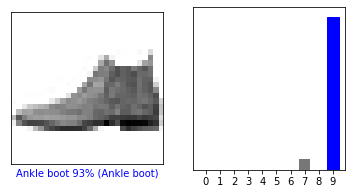

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

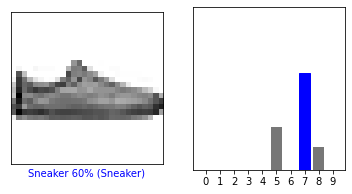

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

让我们用模型的预测绘制几张图像。请注意，即使置信度很高，模型也可能出错。

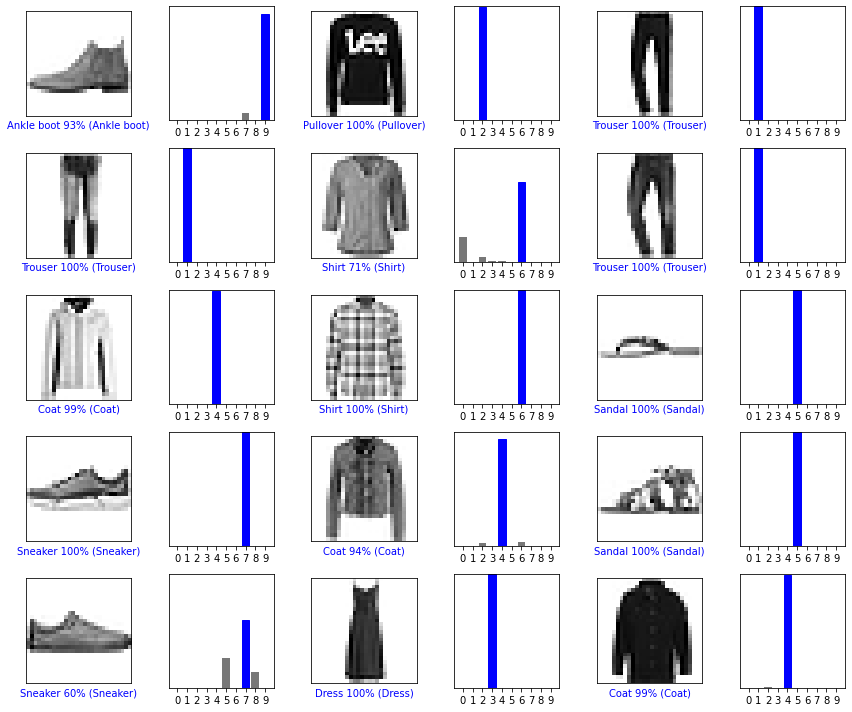

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 使用训练好的模型

最后，使用训练好的模型对单个图像进行预测。

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` 模型经过了优化，可同时对一个*批*或一组样本进行预测。因此，即便您只使用一个图像，您也需要将其添加到列表中：

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


现在预测这个图像的正确标签：

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.0675135e-05 2.4023437e-12 9.9772269e-01 1.3299730e-09 1.2968916e-03
  8.7469149e-14 9.6970733e-04 5.4669354e-19 2.4514609e-11 1.8405429e-12]]


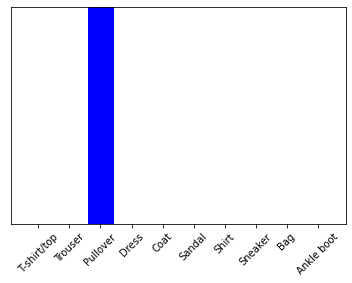

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` 会返回一组列表，每个列表对应一批数据中的每个图像。在批次中获取对我们（唯一）图像的预测：

In [31]:
np.argmax(predictions_single[0])

2

该模型会按照预期预测标签。